# Linear Regression

## Iris dataset  

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold

In [7]:
from sklearn import datasets 
iris = datasets.load_iris() 
# iris

In [9]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [10]:
type(iris)

sklearn.utils.Bunch

In [11]:
X_all = iris.data 
X_all[:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [12]:
X_all.shape

(150, 4)

In [13]:
X = X_all[:, 0] 
y = X_all[:, 2]
print(X[0:3])
print(y[0:3])

[5.1 4.9 4.7]
[1.4 1.4 1.3]


Text(0, 0.5, 'Petal length')

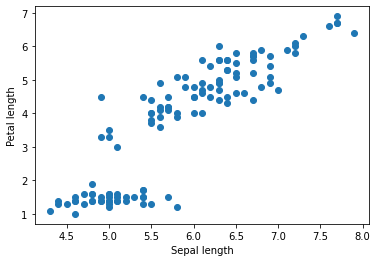

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X_train, y_train, marker='o') 
plt.xlabel("Sepal length") 
plt.ylabel("Petal length")

In [16]:
from sklearn.linear_model import LinearRegression 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
linr = LinearRegression()
linr.fit(X_train.reshape(-1,1), y_train)
print("Train Score : {:.3f}".format(linr.score(X_train.reshape(-1,1), y_train)))
print("Test Score : {:.3f}".format(linr.score(X_test.reshape(-1,1), y_test)))

Train Score : 0.761
Test Score : 0.735


In [17]:
print(linr.coef_, linr.intercept_)

[1.84418386] -7.092198446449805


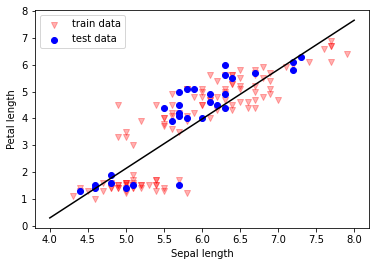

In [19]:
plt.scatter(X_train, y_train, marker='v', c='r', alpha=0.3) 
plt.scatter(X_test, y_test, marker='o', c='b') 
plt.legend(['train data', 'test data'])
plt.xlabel("Sepal length")
plt.ylabel("Petal length")

xx = np.linspace(4, 8, 3)
plt.plot(xx, linr.coef_ * xx + linr.intercept_, "k-")

- let's try predict  the petal width using the other 3 features

In [ ]:
# adjusted R2
def adj_R2 (X, y, R2): 
    n = len(y)      # no of samples
    p = X.shape[1]  # no of features
    return (1 - (1-R2)*(n-1)/(n-p-1))

X, y = X_all[:, 0:3], X_all[:, 3]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
linr = LinearRegression()
linr.fit(X_train, y_train)
print(linr.score(X_test, y_test), adj_R2(X_test, y_test, linr.score(X_test, y_test)))
linr.coef_, linr.intercept_

0.9366458340213003 0.929335737946835


(array([-0.20146787,  0.21851272,  0.51945875]), -0.2446084858761901)

## KFold() Cross Validation 

In [20]:
X = X_all[:,0]
y = X_all[:,2]

cv = KFold(n_splits=5, shuffle=True)  # Returns the number of splitting iterations in the cross-validator.
score = cross_val_score(LinearRegression(), X.reshape(-1,1), y, cv=cv)

print(score.round(2))
print(score.mean().round(2))

[0.73 0.76 0.69 0.81 0.78]
0.75


In [ ]:
## what is cv?
print(cv)
print(cv.get_n_splits(X))

KFold(n_splits=5, random_state=None, shuffle=True)
5


In [ ]:
for train_index, test_index in cv.split(X):
    print("TRAIN:\n", train_index,'\n', "TEST:\n", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN:
 [  0   1   2   3   4   7  10  11  12  13  14  15  17  18  19  21  22  23
  25  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  44  45
  47  48  50  51  53  54  57  58  59  60  61  62  63  65  66  67  70  71
  73  74  75  76  77  78  79  80  81  82  86  88  89  90  91  92  93  94
  95  96  98  99 100 101 102 103 104 107 108 109 110 112 113 114 115 116
 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 134 135
 136 137 138 139 141 142 143 145 146 147 148 149] 
 TEST:
 [  5   6   8   9  16  20  24  26  42  43  46  49  52  55  56  64  68  69
  72  83  84  85  87  97 105 106 111 133 140 144]
TRAIN:
 [  0   2   5   6   8   9  14  15  16  17  19  20  21  22  23  24  25  26
  27  28  29  30  31  32  33  34  35  36  37  40  41  42  43  44  45  46
  49  51  52  53  55  56  57  58  59  61  63  64  66  67  68  69  70  71
  72  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  91
  92  93  94  95  97  99 100 101 102 103 104 105 106 107 108 109 110 111

In [22]:
## using decision tree
from sklearn.tree import DecisionTreeRegressor 
dec_reg = DecisionTreeRegressor()
dec_reg.fit(X_train.reshape(-1,1), y_train) 
print(dec_reg.score(X_test.reshape(-1,1), y_test))

0.7830573786919565


## 몸무게 예측

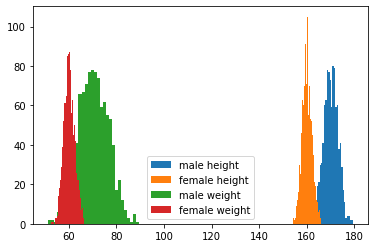

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split

n_samples = 1000
x1 = 3*np.random.randn(n_samples) + 170
x2 = 2*np.random.randn(n_samples) + 160

y1 = 2*x1 - 270 + 2*np.random.randn(n_samples) # 평균 70kg
y2 = 1*x2 - 100 + np.random.randn(n_samples)   # 평균 60kg
plt.hist(x1, bins=30)
plt.hist(x2, bins=30)

plt.hist(y1, bins=30)
plt.hist(y2, bins=30)
plt.legend(['male height','female height','male weight','female weight'])
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2)
leg1 = LinearRegression()
leg1.fit(X_train.reshape(-1,1), y_train)

print(leg1.coef_)
print(leg1.score(X_test.reshape(-1,1), y_test))

[1.97730157]
0.9109551033198505


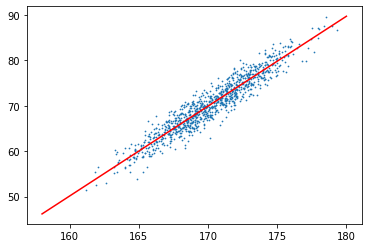

In [ ]:
xs = np.linspace(158, 180, 100)
ys = xs * leg1.coef_[0] + leg1.intercept_
plt.scatter(x1, y1, s=0.5)
plt.plot(xs, ys, c='r')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size=0.2)
leg1 = LinearRegression()
leg1.fit(X_train.reshape(-1,1), y_train)

print(leg1.coef_, leg1.intercept_)
print(leg1.score(X_test.reshape(-1,1), y_test))

[1.00613997] -100.97631912719032
0.8074358669921751


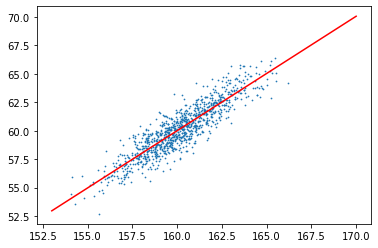

In [ ]:
xs = np.linspace(153,170,100)
ys = xs * leg1.coef_[0] + leg1.intercept_
plt.scatter(x2, y2, s=0.5)
plt.plot(xs, ys, c='r')

In [ ]:
# put together
x = np.concatenate((x1, x2))   # height
y = np.concatenate((y1, y2))   # weight

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
leg1 = LinearRegression()
leg1.fit(X_train.reshape(-1,1), y_train)

print(leg1.coef_, leg1.intercept_)
print(leg1.score(X_test.reshape(-1,1), y_test))

[1.15430341] -125.36643463172084
0.8573005619570313


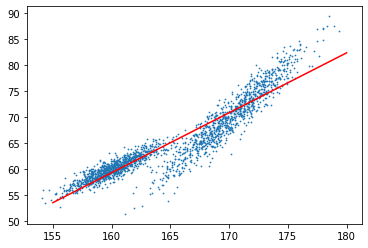

In [ ]:
xs = np.linspace(155,180,100)
ys = xs * leg1.coef_[0] + leg1.intercept_
plt.scatter(x, y, s=0.5)
plt.plot(xs, ys, c='r')

- Now, we will add another feature (sex)

In [ ]:
X1 = pd.DataFrame({'height':x1, 'sex':0})
X2 = pd.DataFrame({'height':x2, 'sex':1})
X = pd.concat([X1, X2], ignore_index=True)  # 기존 인덱스 무시

In [ ]:
X.tail()

,height,sex
1995,160.729042,1
1996,162.833918,1
1997,161.346200,1
1998,166.209808,1
1999,161.995252,1


In [ ]:
y[-5:]

array([59.31393859, 65.11355641, 62.74068412, 64.17832054, 61.65013602])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
leg = LinearRegression()
leg.fit(X_train, y_train)

print(leg.coef_, leg.intercept_)
print(leg.score(X_test, y_test))

[1.68286491 6.70879394] -216.06405261149808
0.9179965567838565


In [ ]:
## 위의 결과는 1.67*zl + 6.8*성별 - 215.43 의 선형 모델 구성
## score 는 92 % 로 향상
## 성별은 0(남성), 1(여성)

In [ ]:
X_train[:10]

,height,sex
1350,158.959723,1
1567,157.909860,1
1813,160.372199,1
1933,158.834963,1
435,169.491068,0
1336,163.785795,1
8,174.904437,0
1206,160.619783,1
982,170.558020,0
649,166.658791,0


In [ ]:
# K-Fold Cross validation (교차겸증)
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
X.shape

(2000, 2)

In [ ]:
cv = KFold(n_splits=5, shuffle=True) # Whether to shuffle the data before 
                                      # splitting into batches.
score = cross_val_score(leg, X, y, cv=cv)
score, score.mean()

(array([0.91992475, 0.93343205, 0.9146234 , 0.92943567, 0.91391986]),
 0.9222671466381881)

In [ ]:
# decision tree
from sklearn.tree import DecisionTreeRegressor 
dec_reg = DecisionTreeRegressor()
dec_reg.fit(X_train, y_train) 
print("Train score: {}".format(dec_reg.score(X_train, y_train)))
print("Test score: {}".format(dec_reg.score(X_test, y_test)))

Train score: 0.9999720691774251
Test score: 0.9095318151293608


In [ ]:
X_train[:5]

,height,sex
1350,158.959723,1
1567,157.909860,1
1813,160.372199,1
1933,158.834963,1
435,169.491068,0


In [ ]:
y_train[:5]

array([58.79390011, 57.90165551, 59.78505151, 59.76862044, 69.84317103])

# Additional for Linear Regression
- adjusted R-squared

In [ ]:
n_samples = 100
x1 = 3*np.random.randn(n_samples) + 170
y1 = 2*x1 - 270 + 2*np.random.randn(n_samples)

In [ ]:
model1 = LinearRegression()
model1.fit(x1.reshape(-1,1), y1)
print(model1.score(x1.reshape(-1,1), y1))
print(model1.coef_, model1.intercept_)

0.9147414701535532
[2.04423858] -277.9159257865645


In [ ]:
x2 = np.random.randn(n_samples)
model2 = LinearRegression()
model2.fit(np.c_[x1, x2], y1)
print(model2.score(np.c_[x1, x2], y1))
print(model2.coef_, model2.intercept_)

0.9151487722980893
[ 2.04187068 -0.13769302] -277.50238242492696


In [ ]:
x3 = np.random.randn(n_samples) * 100
model3 = LinearRegression()
model3.fit(np.c_[x1, x2, x3], y1)
print(model3.score(np.c_[x1, x2, x3], y1))
print(model3.coef_, model3.intercept_)

0.9153851265774946
[ 2.03907920e+00 -1.40786628e-01 -9.54612408e-04] -277.05022883838654


In [ ]:
x4 = np.random.randn(n_samples,20)   # 100x20
x_all = np.concatenate((np.c_[x1, x2, x3], x4), axis=1)   # 100x23

model4 = LinearRegression()
model4.fit(x_all, y1)
print(model4.score(x_all, y1))
print(model4.coef_, model4.intercept_)

0.9292304054551574
[ 2.07935439e+00 -5.22049816e-02 -8.15900410e-04 -1.50476326e-02
  1.90945389e-01 -2.30811488e-02  1.04033035e-01 -7.05605608e-02
  3.28504964e-01 -1.28106470e-01 -8.36201031e-02  1.20474131e-01
 -2.07081406e-01 -2.86381776e-02 -3.71755886e-01 -4.23038235e-01
 -2.93901510e-01  2.66962277e-01  2.82853640e-01 -2.66559982e-02
 -3.10914757e-01  3.51174564e-01 -1.82085951e-01] -283.96038161984137


- R-square is deceptive. R-squared **never decreases** when a new X variable is added to the model.

- Adjustred R-squared: 
  - It identifies the percentage of variance in the target field that is explained by the input or inputs.
  - it is always less than R-squared.
  - A value of 1 indicates a model that perfectly predicts values in the target field. 
  - A value that is less than or equal to 0 indicates a model that has no predictive value. In the real world, adjusted R2 lies between these values.
  - The definition is shown in the following example.
- The adjusted R2 tells you the percentage of variation explained by only the feature variables that actually affect the target variable.
- If n is large, not that big difference. But, when n is small, it can give significant difference.

In [ ]:
def adj_R2 (X, y, R2): 
    n = len(y)      # no of samples
    p = X.shape[1]  # no of features
    return (1 - (1-R2)*(n-1)/(n-p-1))

In [ ]:
model1 = LinearRegression()
model1.fit(x1.reshape(-1,1), y1)
R2 = model1.score(x1.reshape(-1,1), y1)
print(R2, adj_R2(x1.reshape(-1,1), y1, R2))

0.9147414701535532 0.9138714851551201


In [ ]:
x2 = np.random.randn(n_samples)
model2 = LinearRegression()
model2.fit(np.c_[x1, x2], y1)

R2 = model2.score(np.c_[x1, x2], y1)
print(R2, adj_R2(np.c_[x1, x2], y1, R2))

0.9161796699257732 0.9144514156974386


In [ ]:
x4 = np.random.randn(n_samples,20)   # 1000x20
x_all = np.concatenate((np.c_[x1, x2, x3], x4), axis=1)   # 1000x23

model4 = LinearRegression()
model4.fit(x_all, y1)
R2 = model4.score(x_all, y1)
print(R2, adj_R2(x_all, y1, R2))

0.936240951627792 0.916945450146729


- another way (use statsmodels.api)

In [ ]:
# another way
import statsmodels.api as sm

X1 = sm.add_constant(x1.reshape(-1,1))
result = sm.OLS(y1, X1).fit()  # OLS(ordinary least square) - linear
print (result.rsquared, result.rsquared_adj)

0.9147414701535532 0.9138714851551201


In [ ]:
X1 = sm.add_constant(np.c_[x1, x2])
result = sm.OLS(y1, X1).fit()  # OLS(ordinary least square) - linear
print (result.rsquared, result.rsquared_adj)

0.916179669925773 0.9144514156974385


In [ ]:
X1 = sm.add_constant(x_all)
result = sm.OLS(y1, X1).fit()  
print (result.rsquared, result.rsquared_adj)

0.9362409516277913 0.9169454501467281


In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     48.52
Date:                Wed, 02 Nov 2022   Prob (F-statistic):           2.65e-36
Time:                        02:55:25   Log-Likelihood:                -197.98
No. Observations:                 100   AIC:                             444.0
Df Residuals:                      76   BIC:                             506.5
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -278.3421     11.206    -24.838      0.000    -300.661    -256.023
x1             2.0463      0.066     31.025      0.000       1.915       2.178
x2             0.2494      0.221      1.130      0.262      -0.190       0.689
x3            -0.0011      0.002     -0.536      0.593      -0.005       0.003
x4             0.0171      0.238      0.072      0.943      -0.458       0.492
x5             0.1694      0.216      0.786      0.434      -0.260       0.599
x6             0.4954      0.228      2.177      0.033       0.042       0.949
x7             0.0382      0.273      0.140      0.889      -0.505       0.582
x8             0.1068      0.222      0.480      0.633      -0.336       0.550
x9             0.0437      0.207      0.211      0.833      -0.368       0.456
x10            0.0427      0.198      0.216      0.830      -0.351       0.436
x11           -0.1035      0.226     -0.458      0.649      -0.554       0.347
x12            0.1145      0.232      0.493      0.623      -0.348       0.577
x13           -0.0384      0.283     -0.136      0.892      -0.602       0.525
x14            0.4246      0.214      1.983      0.051      -0.002       0.851
x15            0.3815      0.201      1.899      0.061      -0.019       0.782
x16           -0.0758      0.216     -0.351      0.726      -0.506       0.354
x17           -0.2020      0.244     -0.828      0.410      -0.688       0.284
x18            0.1422      0.225      0.633      0.529      -0.305       0.590
x19           -0.3392      0.251     -1.353      0.180      -0.839       0.160
x20            0.3270      0.210      1.555      0.124      -0.092       0.746
x21           -0.0409      0.232     -0.176      0.861      -0.504       0.422
x22           -0.1775      0.219     -0.809      0.421      -0.614       0.259
x23           -0.2360      0.199     -1.188      0.239      -0.632       0.160
==============================================================================
Omnibus:                        3.150   Durbin-Watson:                   1.770
Prob(Omnibus):                  0.207   Jarque-Bera (JB):                2.524
Skew:                          -0.358   Prob(JB):                        0.283
Kurtosis:                       3.304   Cond. No.                     9.64e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Additional 2
- let's see how p-values are obtained
- https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

X2 = sm.add_constant(X)   # add a column of ones to an array
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Mon, 14 Nov 2022   Prob (F-statistic):           3.83e-62
Time:                        02:39:47   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.061      0.0

- now let's try to reproduce it

In [ ]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [ ]:
y[:5]

array([151.,  75., 141., 206., 135.])

In [ ]:
lm = LinearRegression()
lm.fit(X,y)
params = np.append(lm.intercept_,lm.coef_)
predictions = lm.predict(X)

newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))
MSE = (sum((y-predictions)**2))/(len(newX)-len(newX.columns))
newX.head()

,Constant,0,1,2,3,4,5,6,7,8,9
0,1.0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,1.0,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,1.0,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,1.0,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,1.0,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [ ]:
MSE

2932.6755365556487

In [ ]:
# Note if you want to use an array, replace the two lines above with the followings:
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilities"] = [params,sd_b,ts_b,p_values]
print(myDF3)

    Coefficients  Standard Errors  t values  Probabilities
0       152.1335            2.576    59.061            NaN
1       -10.0122           59.749    -0.168            NaN
2      -239.8191           61.222    -3.917            NaN
3       519.8398           66.534     7.813            NaN
4       324.3904           65.422     4.958            NaN
5      -792.1842          416.684    -1.901            NaN
6       476.7458          339.035     1.406            NaN
7       101.0446          212.533     0.475            NaN
8       177.0642          161.476     1.097            NaN
9       751.2793          171.902     4.370            NaN
10       67.6254           65.984     1.025            NaN


# Exercise

In [ ]:
df = pd.DataFrame({'key1': ['K0', 'K1', 'K2', 'K3', 'K4', 'K5'],
                   'A': ['A0', 'A1', 'A2', 'A3', 'A4', 'A5']})
other = pd.DataFrame({'key2': ['K0', 'K1', 'K2'],
                      'B': ['B0', 'B1', 'B2']})

In [ ]:
df.head()

,key1,A
0,K0,A0
1,K1,A1
2,K2,A2
3,K3,A3
4,K4,A4


In [ ]:
other.head()

,key2,B
0,K0,B0
1,K1,B1
2,K2,B2


In [ ]:
df.join(other)   # by index

,key1,A,key2,B
0,K0,A0,K0,B0
1,K1,A1,K1,B1
2,K2,A2,K2,B2
3,K3,A3,NaN,NaN
4,K4,A4,NaN,NaN
5,K5,A5,NaN,NaN
